## Importing libraries and packages

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Importing the dataset

In [2]:
%matplotlib inline
sns.set_style('whitegrid')
df = pd.read_csv(r'heart_failure_clinical_records_dataset.csv')



In [3]:
# Selecting only 3 highest correlated features (from random forest ranking and pearson correlation)
df = pd.DataFrame(df.iloc[:,[0,4,7,-1]])

In [4]:
# Appending the list of attributes to be used later when coupling- decoupling the dataframe
ListAttr = []
lengthOfList = len(df)
for i in df:
    print(i)
    ListAttr.append(i)
   


age
ejection_fraction
serum_creatinine
DEATH_EVENT


## Splitting the dataframe in train and test sets

In [5]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df.iloc[:,:], test_size = 0.2, random_state = 0)
print(df_train)

      age  ejection_fraction  serum_creatinine  DEATH_EVENT
134  81.0                 35              1.18            0
145  50.0                 30              0.70            0
63   45.0                 35              1.00            1
292  52.0                 38              1.00            0
284  50.0                 40              0.80            0
..    ...                ...               ...          ...
251  55.0                 35              0.80            0
192  50.0                 40              0.70            0
117  85.0                 60              3.20            0
47   60.0                 38              0.60            1
172  70.0                 60              1.10            0

[239 rows x 4 columns]


## Scaling the train set features 

In [6]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_train_scaled= min_max_scaler.fit_transform(df_train)

df_train_scaled= pd.DataFrame(data= df_train_scaled, columns=ListAttr)
df_test_scaled= min_max_scaler.transform(df_test)
df_test_scaled= pd.DataFrame(data= df_test_scaled, columns=ListAttr)

## Defining independent and dependent variables

In [7]:
X_train=df_train_scaled.iloc[:, 0:-1]
y_train=df_train_scaled.iloc[:,-1]
X_test=df_test_scaled.iloc[:,0:-1]
y_test=df_test_scaled.iloc[:,-1]


## Dealing with data imbalance

### Using Median CBSO to create synthetic data

In [8]:
import itertools
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import pairwise_distances


In [9]:
   def __init__(
                 proportion=1.0,
                 n_neighbors=5,
                 C_p=1.3,
                 n_jobs=1,
                 random_state=None):

        proportion = proportion
        n_neighbors = n_neighbors
        C_p = C_p
        n_jobs = n_jobs

        set_random_state(random_state)

In [10]:
def set_random_state(random_state):

       

        if random_state is None:
           random_state = np.random
        elif isinstance(random_state, int):
           random_state = np.random.RandomState(random_state)
        elif isinstance(random_state, np.random.RandomState):
           random_state = random_state
        elif random_state is np.random:
            random_state = random_state
        else:
            raise ValueError(
                "random state cannot be initialized by " + str(random_state))

        return random_state    

In [11]:
        proportion=1.0
        n_neighbors=5
        C_p=1.3
        n_jobs=1
        random_state=None

        
        random_state = set_random_state(random_state)

In [12]:
class_stats = dict()
min_label = maj_label = ''

In [13]:
def class_label_statistics(X, y):
        """
        determines class sizes and minority and majority labels
        Args:
            X (np.array): features
            y (np.array): target labels
        """
        unique, counts = np.unique(y, return_counts=True)
        class_stats = dict(zip(unique, counts))
        min_label = unique[0] if counts[0] < counts[1] else unique[1]
        maj_label = unique[1] if counts[0] < counts[1] else unique[0]
        # shorthands
        min_label = min_label
        maj_label = maj_label

        return class_stats, min_label, maj_label

In [14]:
def det_n_to_sample(strategy, n_maj, n_min):
        if isinstance(strategy, float) or isinstance(strategy, int):
            return max([0, int((n_maj - n_min)*strategy)])
        else:
            m = "Value %s for parameter strategy is not supported" % strategy
            raise ValueError(__class__.__name__ + ": " + m)

In [15]:
 def sample_between_points(x, y):
        return x + (y - x)*random_state.random_sample()

In [16]:

def generate_parameter_combinations(dictionary, raw):

      if raw:
          return dictionary
      keys = sorted(list(dictionary.keys()))
      values = [dictionary[k] for k in keys]
      combinations = [dict(zip(keys, p))
                        for p in list(itertools.product(*values))]
      return combinations

In [17]:
def parameter_combinations(raw=False):

        parameter_combinations = {'proportion': [0.1, 0.25, 0.5, 0.75,
                                                 1.0, 1.5, 2.0],
                                  'n_neighbors': [3, 5, 7],
                                  'C_p': [0.8, 1.0, 1.3, 1.6]}
        return generate_parameter_combinations(parameter_combinations, raw)


In [18]:
        X = X_train
        y = y_train        
        class_stats, min_label, maj_label = class_label_statistics(X, y)

        n_to_sample = det_n_to_sample(proportion,
                                           class_stats[maj_label],
                                           class_stats[min_label])

        if n_to_sample == 0:
            print("Sampling is not needed")

        X_min = X[y == min_label]

In [19]:
        # fitting nearest neighbors model to find neighbors of minority points
        nn = NearestNeighbors(n_neighbors=n_neighbors + 1, n_jobs=n_jobs).fit(X)
        dist, ind = nn.kneighbors(X_min)

        # extracting the number of majority neighbors
        weights = [np.sum(y[ind[i][1:]] == maj_label)
                   for i in range(len(X_min))]
        # determine distribution of generating data
        weights = weights/np.sum(weights)


In [20]:
        nn = NearestNeighbors(n_neighbors=2, n_jobs=n_jobs).fit(X_min)
        d_avg = np.mean(nn.kneighbors(X_min)[0][:, 1])
        T_h = d_avg*C_p
        
        clusters = [np.array([i]) for i in range(len(X_min))]
        dm = pairwise_distances(X_min)
        for i in range(len(dm)):
            dm[i, i] = np.inf


In [21]:
# Shape of pairwise distance matrix before clustering
dm.shape

(73, 73)

In [22]:
        while True:
          min_coord = np.where(dm == np.min(dm))
          merge_a = min_coord[0][0]
          merge_b = min_coord[1][0]

          if dm[merge_a, merge_b] > T_h or len(dm) == 1:
            break

          clusters[merge_a] = np.hstack(
                        [clusters[merge_a], clusters[merge_b]])
          del clusters[merge_b]
        
          dm[merge_a] = np.min(np.vstack([dm[merge_a], dm[merge_b]]), axis=0)
          dm[:, merge_a] = dm[merge_a]
        
          dm = np.delete(dm, merge_b, axis=0)
          dm = np.delete(dm, merge_b, axis=1)
          for i in range(len(dm)):
            dm[i, i] = np.inf

In [23]:
# Shape of pairwise distance matrix after clustering
dm.shape

(22, 22)

In [24]:
        # extracting cluster labels
        labels = np.zeros(len(X_min)).astype(int)
        for i in range(len(clusters)):
          for j in clusters[i]:
                      labels[j] = i

In [25]:
# Printing the cluster lael for the minority class samples
print(labels)



[ 0  0  1  0  2  3  4  0  0  0  0  0  0  5  0  6  6  0  0  7  0  0  0  0
  0  8  9  0  0 10  0  0  0  0  0 11 12  0  0  0 13  0  0 14  0  0  6  0
  0  6 15  0  0 16  1  0 17  0  1  0 18  6  0 19  0  0  6  6  6  4 20 21
  0]


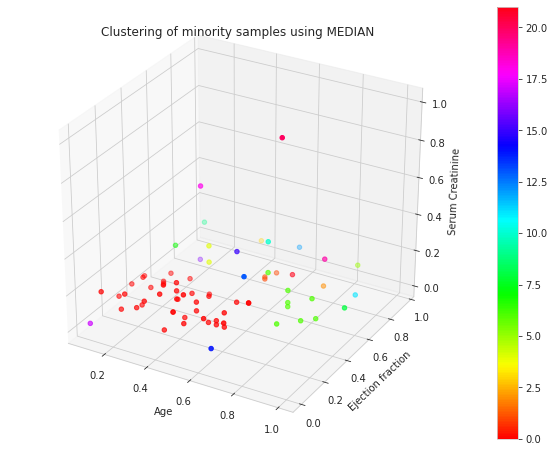

In [26]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(8,6))

ax = Axes3D(fig)

x = X_min['age'].to_list()
y = X_min['ejection_fraction'].to_list()
z = X_min['serum_creatinine'].to_list()
cluster= ax.scatter(x, y, z, c=labels, marker='o', cmap='hsv')
cbar=plt.colorbar(cluster)
ax.set_xlabel('Age')
ax.set_ylabel('Ejection fraction')
ax.set_zlabel('Serum Creatinine')
ax.set_title('Clustering of minority samples using MEDIAN')

plt.show()